In [ ]:
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

11493376/11490434 [==============================] - 0s 0us/step


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1

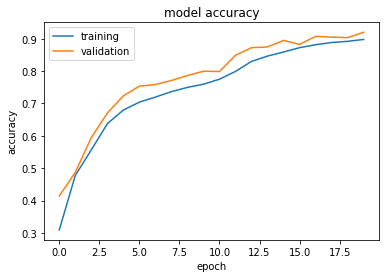

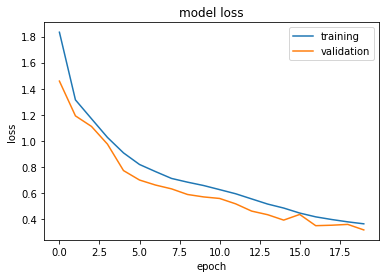

Test loss: 0.356
Test accuracy: 0.902


In [ ]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=10, activation='relu'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

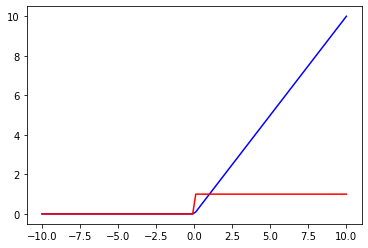

In [ ]:
import numpy as np
def relu(x):
    return np.maximum(x, np.zeros(len(x)))

# This function is non-continuous, but the derivative can be 
# expressed as a very simple discrete function that works for
# our purpose, if x[i] > 0 return 1, else return 0:
def relu_prime(x):
    return np.array([1 if num > 0 else 0 for num in x])

# Construct a range to plot
r = np.linspace(-10, 10, 100)
plt.plot(r, relu(r), 'b')
plt.plot(r, relu_prime(r), 'r')
plt.show()

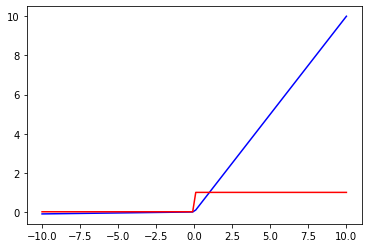

In [ ]:
def leaky_relu(x):
    return np.array([num if num > 0 else num * .01 for num in x])

def leaky_relu_prime(x):
    return np.array([1 if num > 0 else .01 for num in x])

r = np.linspace(-10, 10, 100)
plt.plot(r, leaky_relu(r), 'b')
plt.plot(r, leaky_relu_prime(r), 'r')
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                7850      
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 10)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 10)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 10)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)               

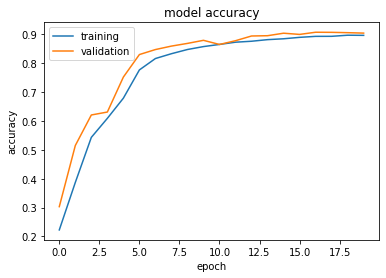

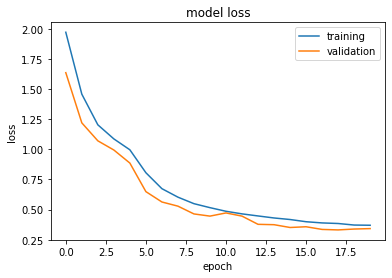

Test loss: 0.373
Test accuracy: 0.897


In [ ]:
from tensorflow.keras.layers import LeakyReLU

model = Sequential()
model.add(Dense(units=10, input_shape=(image_size,)))
model.add(LeakyReLU(alpha=.01))

for _ in range(10):
    model.add(Dense(units=10))
    model.add(LeakyReLU(alpha=.01))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_37 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_38 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_39 (Dense)             (None, 10)                110       
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 10)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                110       
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 10)               

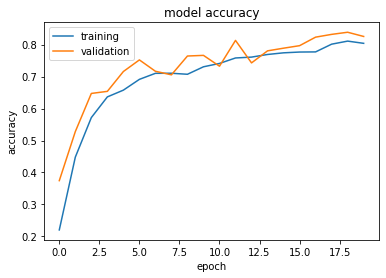

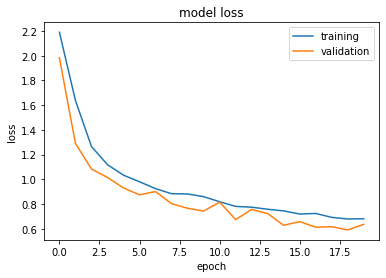

Test loss: 0.692
Test accuracy: 0.809


In [ ]:
model = Sequential()

model.add(Dense(units=10, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=10, activation='exponential'))

model.add(Dense(units=10))
model.add(LeakyReLU(alpha=.01))

model.add(Dense(units=10))
model.add(LeakyReLU(alpha=.05))

model.add(Dense(units=10))
model.add(LeakyReLU(alpha=.3))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_44 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_45 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_46 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_47 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_48 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_49 (Dense)             (None, 10)               

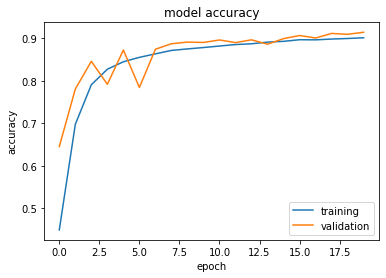

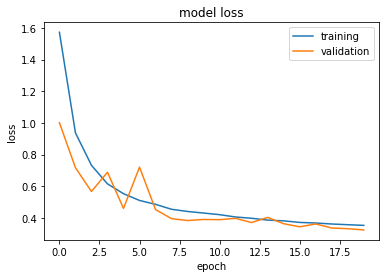

Test loss: 0.356
Test accuracy: 0.903


In [ ]:
model = Sequential()
model.add(Dense(units=10, activation='selu', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=10, activation='selu'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)